# Data Analysis  for the paper 'Suite de pruebas auto-evaluable como examen de laboratorio: una aproximación pragmática con Spring Boot y GitHub'
## To be published at JENUI2023

## Analysis of the Student´s satisfaction survey

### Data import 

Prior to any other data analysis, the files have been anonymized, removing any column that could provide information about the authors of the responses, and substituting them by an integer identifier.
The data of the surveys is provided  in one single file: 
The files is provided in excel format  (with extension .xlsx), thus we use pandas to import  them. 
Additionally, we use  the packages 'plot_likert' and 'matplotlib' to generate charts.

In [ ]:
import pandas as pd
import plot_likert as pl
import matplotlib.pyplot as plt


#===================#
#    DATA IMPORT    #
#===================#
df = pd.read_excel("data/DP12022-Encuesta-anonimizada.xlsx")
display(df)
print(df.columns)

,ID,Start time,Completion time,Columna1,Statement 2,Claridad de los enunciados,Statement 22,Columna3,La claridad del código de las pruebas y el proyecto base proporcionado,Feedback recibido al ejecutar las pruebas para resolver los problemas en su código,...,Feedback recibido al ejecutar las pruebas para resolver los problemas en su código3,Test suite proporcionada con validación automática e inmediata3,Claridad de los enunciados3,Columna5,Statement 24,"Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto de los control check de laboratorio.","¿Tuvo alguna incidencia con las herramientas de desarrollo durante la realización del control-check? (por ejemplo: fallos de configuración del IDE, instalación de Java, librerías no compatibles, etc.)",Pregunta,"¿Tuvo alguna incidencia con la conexión de red, el acceso a Enseñanza Virtual, los PCs del aula, o la configuración del JDK durante la realización del control-check?",¿Hizo el simulacro de control-check disponible previamente a la realización de los control-check reales?
0,1,2022-12-19 08:42:16,2022-12-19 08:43:16,Insuficiente,NaN,Algo insatisfecho/a,NaN,NaN,Ni satisfecho/a ni insatisfecho/a,Algo insatisfecho/a,...,NaN,NaN,NaN,Ni satisfecho/a ni insatisfecho/a,NaN,NaN,Sí,NaN,Sí,Sí
1,2,2022-12-19 08:41:52,2022-12-19 08:43:17,Adecuada,NaN,Muy satisfecho/a,NaN,NaN,Muy satisfecho/a,Algo insatisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,No,NaN,No,Desconocía su existencia
2,3,2022-12-19 08:42:17,2022-12-19 08:43:22,Insuficiente,NaN,Algo satisfecho/a,NaN,NaN,Algo satisfecho/a,Ni satisfecho/a ni insatisfecho/a,...,NaN,NaN,NaN,Algo insatisfecho/a,NaN,NaN,Sí,NaN,No,Sí
3,4,2022-12-19 08:42:30,2022-12-19 08:43:32,Adecuada,NaN,Algo satisfecho/a,NaN,NaN,Algo satisfecho/a,Algo satisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,No,NaN,No,Sí
4,5,2022-12-19 08:42:21,2022-12-19 08:43:42,Adecuada,NaN,Ni satisfecho/a ni insatisfecho/a,NaN,NaN,Algo insatisfecho/a,Algo insatisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,No,NaN,Sí,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,140,2022-12-20 17:37:15,2022-12-20 17:43:08,Suficiente,NaN,Ni satisfecho/a ni insatisfecho/a,NaN,NaN,Algo satisfecho/a,Ni satisfecho/a ni insatisfecho/a,...,NaN,NaN,NaN,Algo insatisfecho/a,NaN,Pienso que el primer control check es muy temp...,No,NaN,Sí,Sí
140,141,2022-12-20 17:41:28,2022-12-20 17:43:48,Adecuada,NaN,Algo satisfecho/a,NaN,NaN,Algo satisfecho/a,Muy satisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,No,NaN,Sí,Sí
141,142,2022-12-20 17:39:56,2022-12-20 17:43:55,Adecuada,NaN,Muy satisfecho/a,NaN,NaN,Muy satisfecho/a,Muy satisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,No,NaN,No,Sí
142,143,2022-12-20 17:48:58,2022-12-20 17:50:32,Muy Adecuada,NaN,Algo satisfecho/a,NaN,NaN,Ni satisfecho/a ni insatisfecho/a,Algo satisfecho/a,...,NaN,NaN,NaN,Algo satisfecho/a,NaN,NaN,Sí,NaN,Sí,Sí


Index(['ID', 'Start time', 'Completion time', 'Columna1', 'Statement 2',
       'Claridad de los enunciados', 'Statement 22', 'Columna3',
       'La claridad del código de las pruebas y el proyecto base proporcionado',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código',
       'La claridad del código de las pruebas y el proyecto base proporcionado2',
       'Test suite proporcionada con validación automática e inmediata2',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código2',
       'Columna2', 'Claridad de los enunciados2', 'Statement 1', 'Columna4',
       'Statement 12', 'Statement 23',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código3',
       'Test suite proporcionada con validación automática e inmediata3',
       'Claridad de los enunciados3', 'Columna5', 'Statement 24',
       'Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cu

## Data Wrangling
Next we modify the structure of the data-frames, since office 365 introduces some spureous columns, and some of the columns names are not appropirate for data analysis and reporting.
First, we remove the spureous columns created by Microsoft Office Forms 365, and show the set of remaining columns in each dataset.

In [ ]:
#=======================#
#    DATA WRANGLING     #
#=======================#
#------------------------#
#    COLUMN REMOVAL      #
#------------------------#
columnsToRemove=['Statement 2','Statement 22', 'Columna3', 'La claridad del código de las pruebas y el proyecto base proporcionado2','Instrucción 2', 'Pregunta4','Instrucción 22',
                     'Test suite proporcionada con validación automática e inmediata2',
                     'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código2',
                     'Claridad de los enunciados2','Statement 1','Statement 12', 'Statement 23',
                     'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código3',
                     'Test suite proporcionada con validación automática e inmediata3',
                     'Claridad de los enunciados3','Statement 24','Pregunta']
df=df.drop(columns=columnsToRemove,errors='ignore')
print("Remaining columns in the dataset")
print(df.columns)

Remaining columns in the dataset
Index(['ID', 'Start time', 'Completion time', 'Columna1',
       'Claridad de los enunciados',
       'La claridad del código de las pruebas y el proyecto base proporcionado',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código',
       'Columna2', 'Columna4', 'Columna5',
       'Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto de los control check de laboratorio.',
       '¿Tuvo alguna incidencia con las herramientas de desarrollo durante la realización del control-check? (por ejemplo: fallos de configuración del IDE, instalación de Java, librerías no compatibles, etc.)',
       '¿Tuvo alguna incidencia con la conexión de red, el acceso a Enseñanza Virtual, los PCs del aula, o la configuración del JDK durante la realización del control-check?',
       '¿Hizo el simulacro de control-check disponible previamente a la realización de los control-check reales?'],
      dtype

Second, we rename and homogeinize the names of the columns in both datasets. Unfortunately, Microsoft Office Forms 365 does not respect the name of the question for the corresponding column of the dataset in most cases, thus we have to rename and homogeinize the names of the columns in both datasets. Apart, from such renaming, we check the columns with duplicated names in order to avoid inconsistences.

In [ ]:
import collections
#------------------------#
#    COLUMN RENAMIG      #
#------------------------#
#   2021 DataSet         #
columnsToRename={'Columna1':'Formación recibida para la realización del control de laboratorio',
                     'Columna2':'Nivel de complejidad del control de laboratorio',                     
                     'Columna4':'Utilidad de la propuesta',
                     'Columna5':'Satisfacción general con la propuesta'
                    }

print("Columns prior to the renaming:")
print(df.columns)
print("Duplicated column names in the dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])
print("--------------------------------------------")
df=df.rename(columns=columnsToRename)

print("Columns after the renaming:")
print(df.columns)
print("Duplicated column names in the dataset:")
print([item for item, count in collections.Counter(df.columns).items() if count > 1])

Columns prior to the renaming:
Index(['ID', 'Start time', 'Completion time', 'Columna1',
       'Claridad de los enunciados',
       'La claridad del código de las pruebas y el proyecto base proporcionado',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código',
       'Columna2', 'Columna4', 'Columna5',
       'Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto de los control check de laboratorio.',
       '¿Tuvo alguna incidencia con las herramientas de desarrollo durante la realización del control-check? (por ejemplo: fallos de configuración del IDE, instalación de Java, librerías no compatibles, etc.)',
       '¿Tuvo alguna incidencia con la conexión de red, el acceso a Enseñanza Virtual, los PCs del aula, o la configuración del JDK durante la realización del control-check?',
       '¿Hizo el simulacro de control-check disponible previamente a la realización de los control-check reales?'],
      dtype='

We swap the order of some  columns  in order to get a consistent merged dataset.

In [ ]:
#------------------------#
#    COLUMN SWAPPING     #
#------------------------#
columnsToSwap={}

#define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

for x in columnsToSwap:
    print(x)
    print(columnsToSwap[x])
    df=swap_columns(df,x,columnsToSwap[x])    

### Figures generation

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

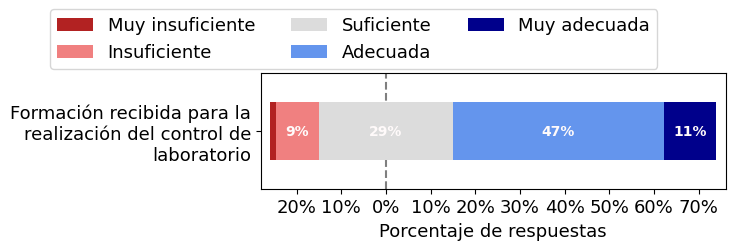

In [ ]:
#================================#
#    LIKERT TEACHING ANALYSIS    #
#================================#
#---------------------------------------#
#    TYPOS FIXING                       #
#---------------------------------------#
# We fix some minor typos in the survey
df=df.replace(['Muy Adecuada'], 'Muy adecuada')
df=df.replace(['Muy Insuficiente'], 'Muy insuficiente')
#---------------------------------------#
#    Plotting                           #
#---------------------------------------#
myTeachingScale = \
    ['Muy insuficiente',
     'Insuficiente',
     'Suficiente',
     'Adecuada',
     'Muy adecuada']

myTeachingPlot=pl.plot_likert(df[[
    'Formación recibida para la realización del control de laboratorio'
]], myTeachingScale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myTeachingPlot.xaxis.set_label_text('Porcentaje de respuestas')
myTeachingPlot.legend(bbox_to_anchor=(0., 1.45, 0.4, .102),loc='upper center',ncol=3, borderaxespad=0.,prop={'size': 13})
ax=myTeachingPlot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
# plotting a line plot after changing it's width and height
teachingFigure = myTeachingPlot.get_figure()
teachingFigure.set_figwidth(6)
teachingFigure.set_figheight(1.5)
teachingFigure.savefig('figs/SatisfaccionFormacionPrevia.png',bbox_inches='tight',dpi=300)
myTeachingPlot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:299: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  warn(


<AxesSubplot: xlabel='Porcentaje de respuestas'>

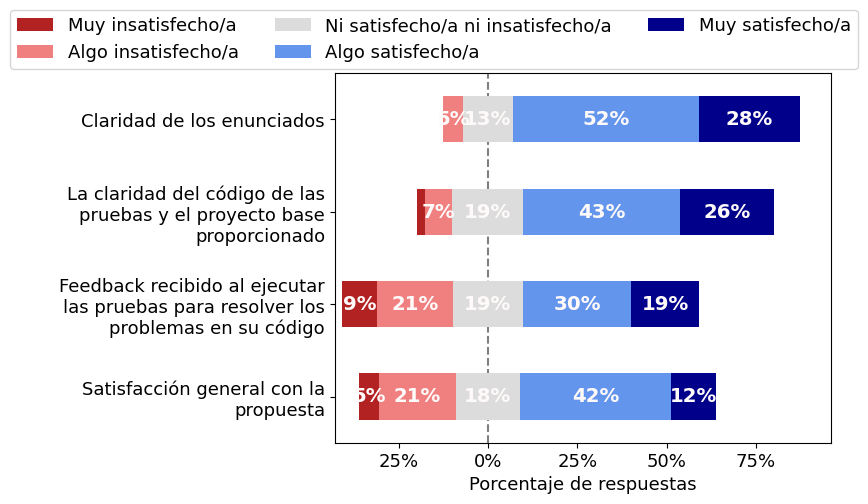

In [89]:
fontsize=14.2
import matplotlib
matplotlib.rcParams.update({'font.size': fontsize})
mySatisfactionScale= \
     ['Muy insatisfecho/a',
     'Algo insatisfecho/a',
     'Ni satisfecho/a ni insatisfecho/a',
     'Algo satisfecho/a',
     'Muy satisfecho/a']
myplot=pl.plot_likert(df[[
       'Claridad de los enunciados',
       'La claridad del código de las pruebas y el proyecto base proporcionado',
       'Feedback recibido al ejecutar las pruebas para resolver los problemas en su código',
        'Satisfacción general con la propuesta'
]], mySatisfactionScale, plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myplot.xaxis.set_label_text('Porcentaje de respuestas')
myplot.legend(bbox_to_anchor=(0., 1.07, 0.4, .102),loc='upper center',ncol=3, borderaxespad=0.,prop={'size': 13})
ax=myplot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
myplot.get_figure().savefig('figs/Satisfaccion.png',bbox_inches='tight',dpi=300);
myplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Porcentaje de respuestas'>

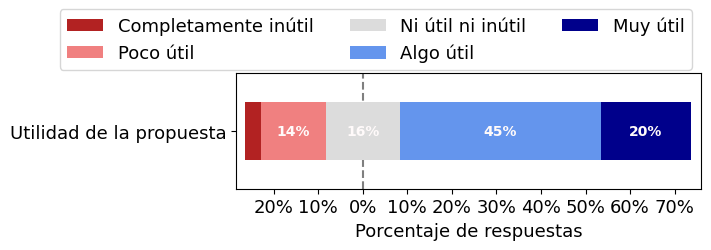

In [ ]:
myUtilityScale= \
     ['Completamente inútil',
     'Poco útil',
     'Ni útil ni inútil',
     'Algo útil',
     'Muy útil']
myUtilityplot=pl.plot_likert(
        df[['Utilidad de la propuesta']], 
        myUtilityScale, 
        plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myUtilityplot.xaxis.set_label_text('Porcentaje de respuestas')
myUtilityplot.legend(bbox_to_anchor=(0., 1.45, 0.6, .102),loc='upper center',ncol=3, borderaxespad=0.,prop={'size': 13})
ax=myUtilityplot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)

utilityFigure = myUtilityplot.get_figure()
utilityFigure.set_figwidth(6)
utilityFigure.set_figheight(1.5)
utilityFigure.savefig('figs/Utilidad.png',bbox_inches='tight',dpi=300);
myUtilityplot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


<AxesSubplot: xlabel='Complejidad percibida'>

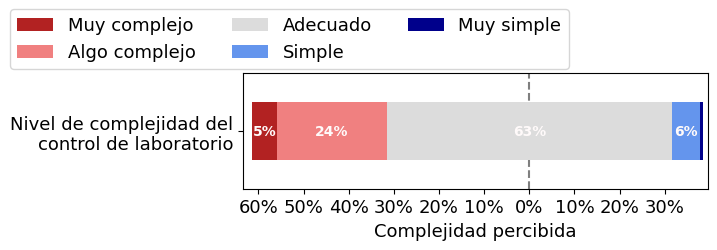

In [ ]:

complexityScale = \
    ['Muy complejo',
     'Algo complejo',
     'Adecuado',
     'Simple',
     'Muy simple']
#df.replace(df['Claridad de los criterios de evaluación'].unique()[3],'Muy insatisfecho/a',inplace=True)

myComplexityPlot=pl.plot_likert(
                df[['Nivel de complejidad del control de laboratorio']], 
                complexityScale, 
                plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myComplexityPlot.xaxis.set_label_text('Complejidad percibida')
myComplexityPlot.legend(bbox_to_anchor=(0., 1.45, 0.2, .102),loc='upper center',ncol=3, borderaxespad=0.,prop={'size': 13})
ax=myComplexityPlot
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)

complexityFigure = myComplexityPlot.get_figure()
complexityFigure.set_figwidth(6)
complexityFigure.set_figheight(1.5)
complexityFigure.savefig('figs/Complejidad.png',bbox_inches='tight',dpi=300);
myComplexityPlot

C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)
C:\Users\japarejo\anaconda3\envs\JENUIAISS2023\lib\site-packages\plot_likert\plot_likert.py:251: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df = df.set_axis(new_labels, axis=1, inplace=False)


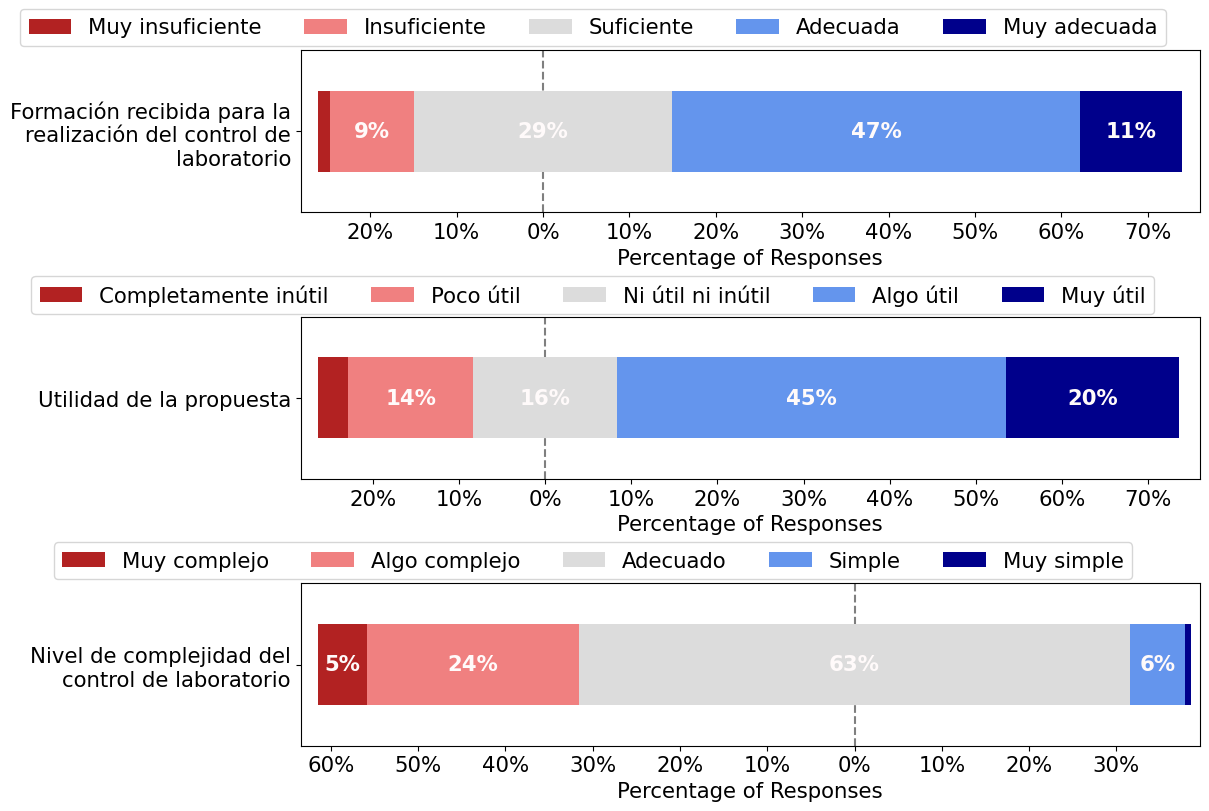

In [86]:
# Combined figure:
fontsize=15.3
import matplotlib
matplotlib.rcParams.update({'font.size': fontsize})
f, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=False, figsize=(12,8),constrained_layout=True)
myComplexityPlot=pl.plot_likert(
         df[['Nivel de complejidad del control de laboratorio']], 
         complexityScale, 
         ax=ax3,
         plot_percentage=True, bar_labels=True, bar_labels_color="snow")
myComplexityPlot.legend(bbox_to_anchor=(0., 1.15, 0.65, .102),loc='upper center',ncol=5, borderaxespad=0.,prop={'size': fontsize})
for item in ([ax3.title, ax3.xaxis.label, ax3.yaxis.label] +
             ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(fontsize)

utilityPlot=pl.plot_likert(
        df[['Utilidad de la propuesta']], 
        myUtilityScale,
        ax=ax2,
        plot_percentage=True, bar_labels=True, bar_labels_color="snow")
utilityPlot.legend(bbox_to_anchor=(0., 1.15, 0.65, .102),loc='upper center',ncol=5, borderaxespad=0.,prop={'size': fontsize})

for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +                           
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(fontsize)



teachingPlot=pl.plot_likert(df[['Formación recibida para la realización del control de laboratorio']],
            myTeachingScale, 
            ax=ax1,
            plot_percentage=True, bar_labels=True, bar_labels_color="snow")
teachingPlot.legend(bbox_to_anchor=(0., 1.15, 0.65, .102),loc='upper center',ncol=5, borderaxespad=0.,prop={'size': fontsize})
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(fontsize)    
f.savefig('figs/LikertCombinado.png',bbox_inches='tight',dpi=300);
# plt.show()

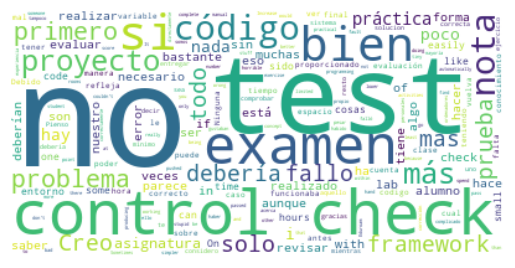

In [ ]:
from wordcloud import WordCloud
import numpy as np
import csv
suggestions=df["Exprese cualquier sugerencia, crítica, o comentario que desee que tengamos en cuenta respecto de los control check de laboratorio."].replace('', np.nan).dropna()
stopwords = ["o","a","e","y","de","en","que","el","al","lo","los","la","las","the","mi","me","en","muy","cómo","como","para","por","del","un","una","se","es","con","pero","además","Además","También","ya"]
text = " ".join(suggestions)
wordcloud = WordCloud(collocations = True, background_color="white", stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('figs/WordCloud.png',bbox_inches='tight',dpi=300)
plt.show()

## Analysis of the marks of the academical courses 2019-2020, 2020-2021, and 2021-2022

Next we analyze the marks of the students during the course prior to the application of the new methodology and the two courses where the new methodology was applied.

### Data loading
We load three anonymized csv files with the marks obtained by the students in each course.

In [ ]:
#notas2020 = pd.read_excel("data/Notas-DP1-2020.xlsx")
#notas2021 = pd.read_excel("data/Notas-DP1-2021.xlsx")
notas2022 = pd.read_csv("data/NotasDP1-2022-2023.csv",sep=";")
notas2021 = pd.read_csv("data/NotasDP1-2021-2022.csv",sep=";")
notas2020 = pd.read_csv("data/NotasDP1-2020-2021.csv",sep=";")
display(notas2020)
display(notas2021)
display(notas2022)

,Final Project,Theory Contro-check - Final [Puntos totales: 100 Puntuación] |31786,Theory Control-check Final - Special needs [Puntos totales: 100 Puntuación] |31786,Final Control-Check in English [Puntos totales: 100 Puntuación] |31792,Final Theory Control-check [Puntos totales: 0 Texto] |319803,Final Individual work-group [Puntos totales: 0 Texto] |341991,Final Mark,Definitive Final Mark [Puntos totales: 0 Texto] |343423,September: Final Project Deliverables [Puntos totales: 10 Puntuación] |37768,September: Individual workgroup report [Puntos totales: 10 Puntuación] |37768,Teoría Septiembre [Puntos totales: 100 Puntuación] |3782,Teoría Septiembre (Necesidades especiales) [Puntos totales: 100 Puntuación] |3782,Theory Contro-check (ENGLISH) - September [Puntos totales: 100 Puntuación] |37825,Teoría Septiembre (Remoto) [Puntos totales: 100 Puntuación] |3782,Teoría Septiembre Gobal [Puntos totales: 0 Texto] |39041,Tabajo En Grupo Septiembre [Puntos totales: 0 Texto] |390418,Nota Final Septiembre [Puntos totales: 0 Texto] |390419,Calificación Definitiva Septiembre [Puntos totales: 0 Texto] |39042
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,62.0,NaN,NaN,PASS,PASS,5,APROBADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"8,4",NaN,NaN,NaN,NaN,NaN,4,SUSPENSO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"9,25",NaN,NaN,NaN,PASS,PASS,"9,25",SOBRESALIENTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"9,4",83.0,NaN,NaN,PASS,PASS,"9,4",MATRÍCULA DE HONO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,"3,5",NaN,NaN,NaN,PASS,PASS,"3,5",SUSPENSO,9,10.0,NaN,NaN,NaN,NaN,NaN,9,9,SOBRESALIENTE
272,"9,25",NaN,NaN,NaN,PASS,PASS,"9,25",SOBRESALIENTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,"8,5",NaN,NaN,NaN,PASS,PASS,"8,5",NOTABLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Final Mark December [Puntos totales: 0 Texto] |414620,Calificación Diciembre [Puntos totales: 0 Texto] |41462,Pre-test for theory control check [Puntos totales: 100 Puntuación] |41482,Sprint 3 Deliverables / Entrega Sprint 3 [Puntos totales: 10 Puntuación] |41517,Puntuación del trabajo en grupo en el Sprint 3 [Puntos totales: 10 Puntuación] |4151,Sprint 3 Retrospective / Retrospectiva del Sprint 3 [Puntos totales: 10 Puntuación] |41517,Theory Mark [Puntos totales: 0 Texto] |438507,Practice Mark,Individual Project Mark,Final Mark,Final Calification [Puntos totales: 0 Texto] |438511,September: Final Project Deliverables [Puntos totales: 10 Puntuación] |46567,September: Individual workgroup report [Puntos totales: 10 Puntuación] |46567,September: Lab Control-check [Puntos totales: 10 Puntuación] |46567,Control Check Teoría Septiembre [Puntos totales: 100 Puntuación] |4658,Theory ControlCheck September (English) [Puntos totales: 100 Puntuación] |46583
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"3,2",NaN,NaN,"0,6",SUSPENSO,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,100.0,Necesita calificació,Necesita calificació,Necesita calificació,"6,1",7.0,"5,32","5,7",APROBADO,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,86.0,Necesita calificació,Necesita calificació,Necesita calificació,"7,8",10.0,"6,8","7,5",NOTABLE,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,100.0,Necesita calificació,Necesita calificació,Necesita calificació,"7,1",5.0,7,"6,7",APROBADO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,66.0,Necesita calificació,Necesita calificació,Necesita calificació,"7,3",8.0,"5,6","6,3",APROBADO,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO PRESENTADO,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,100.0,Necesita calificació,Necesita calificació,Necesita calificació,8,10.0,"6,6","7,4",NOTABLE,NaN,NaN,NaN,NaN,NaN


,Lab control check 1 English Group,Lab controk check 1 Grupo de Laboratorio 3,Lab controk check 1 Grupos de Laboratorio 4 y 5,Lab controk check 1 Grupo de Laboratorio 1 y 2,Lab controk check 1 Grupos de Laboratorio de Tarde,Control check 1,Lab control check 2 English Group [Puntos totales: 10 Puntuaci��n] |5,"Lab Control Check 2 Grupos de laboratorio L6, L7 y L8 [Puntos totales: 10 Puntuaci��n] |5",Lab controk check 2 Grupos de Laboratorio L4 y L5 [Puntos totales: 10 Puntuaci��n] |5,Lab controk check 2 Grupo de Laboratorio L3 [Puntos totales: 10 Puntuaci��n] |5,Lab controk check 2 Grupos de Laboratorio L1 y L2 [Puntos totales: 10 Puntuaci��n] |5,Control Check 2,Parcial Lab Control Check,Final Lab Control-check,Nota Final Lab Control Check
0,NaN,NaN,NaN,NaN,8.0,8.0,NaN,7.0,NaN,NaN,NaN,7.0,"7,5",NaN,"7,5"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,1.0,1,4.0,4
4,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"0,5",NaN,"0,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,NaN,NaN,NaN,8.0,8.0,NaN,10.0,NaN,NaN,NaN,10.0,10,NaN,10
254,NaN,8.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0,"6,5",NaN,"6,5"
255,NaN,NaN,NaN,NaN,5.0,5.0,NaN,3.0,NaN,NaN,NaN,3.0,4,NaN,4
256,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0,0.0,0


### Figures generation

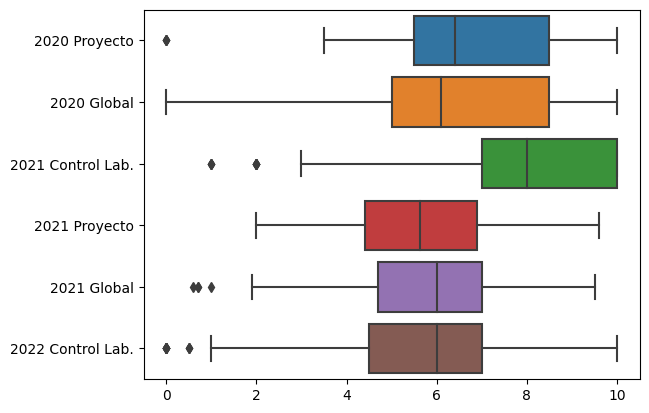

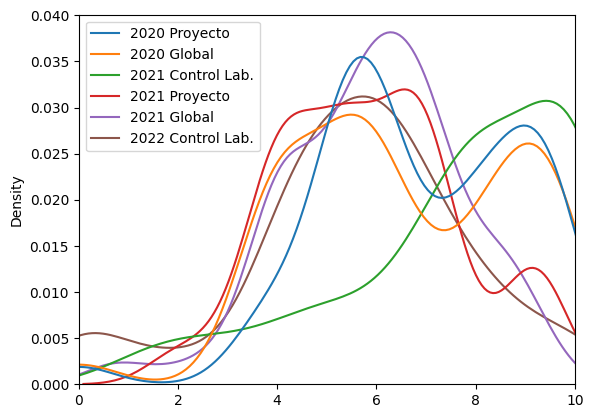

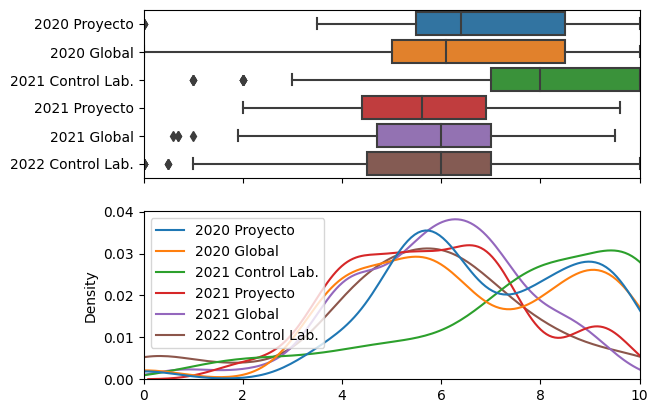

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
#print(notas2021.columns)
#notaFinal2020=notas2020["NOTA FINAL"].dropna()
#notafinal2020=notafinal2020[notafinal2020 != 0.0]
notas2020=notas2020.replace(",",".", regex=True)
notas2020["Final Mark"]=notas2020["Final Mark"].astype(float)
notaFinal2020=notas2020["Final Mark"].dropna()
notas2020["Final Project"]=notas2020["Final Project"].astype(float)
notaProyecto2020=notas2020["Final Project"].dropna()
notas2021=notas2021.replace(",",".", regex=True)
notas2021["Practice Mark "]=notas2021["Practice Mark "].astype(float)
notaLab2021=notas2021["Practice Mark "].dropna()
notas2021["Final Mark"]=notas2021["Final Mark"].astype(float)
notaFinal2021=notas2021["Final Mark"].dropna()
notas2021["Individual Project Mark"]=notas2021["Individual Project Mark"].astype(float)
notaProyecto2021=notas2021["Individual Project Mark"].dropna()
#notafinal2021=notafinal2021[notafinal2021 != 0.0]
notas2022=notas2022.replace(",",".", regex=True)
notas2022["Nota Final Lab Control Check"]=notas2022["Nota Final Lab Control Check"].astype(float)
notaLab2022=notas2022["Nota Final Lab Control Check"].dropna()
#print(notaLab2022)
#notafinal2022=notafinal2022[notafinal2022 != 0.0]


#notas=[notafinal2020,notafinal2021,notafinal2022]
#notasDict={"2020":notafinal2020,"2021":notafinal2021,"2022":notafinal2022}

notas=[notaLab2022]
notasDict={"2020 Proyecto":notaProyecto2020,
           "2020 Global":notaFinal2020,
           "2021 Control Lab.":notaLab2021,
           "2021 Proyecto":notaProyecto2021,
           "2021 Global":notaFinal2021,
           "2022 Control Lab.":notaLab2022}
#fig,ax=plt.subplots()
#plt.boxplot(notas, labels=["2020","2021","2022"])
#ax.yaxis.set_minor_locator(MultipleLocator(1))
sns.boxplot(data=pd.DataFrame(notasDict),orient="h")
plt.savefig('figs/Notas.png',bbox_inches='tight',dpi=300)
plt.show()


sns.kdeplot(notasDict)
plt.xlim(0, 10)
plt.savefig('figs/DisbribucionesNotas.png',bbox_inches='tight',dpi=300)
plt.show()


f, (ax_box, ax_kde) = plt.subplots(2, sharex=True)
sns.boxplot(data=pd.DataFrame(notasDict),orient="h",ax=ax_box)
sns.kdeplot(notasDict,ax=ax_kde)
ax_box.set(xlabel='')
plt.xlim(0, 10)
plt.savefig('figs/DistribucionesYBoxplotNotasCombinadas.png',bbox_inches='tight',dpi=300)
plt.show()



### Statistical tests on the differences  of  the distributions

#### Test assumptions: Normality 

In [ ]:
from scipy.stats import shapiro

display(shapiro(notafinal2020))
display(shapiro(notafinal2021))
display(shapiro(notafinal2022))

NameError: name 'notafinal2020' is not defined

Thus our results are not normal! However, appart from the recommended approach in this case, non-parametic tests (specifically we use Mann-Withney U tests) we will perform also parametric tests (in this case Welch's test).

In [ ]:
from pingouin import ttest
from pingouin import mwu
from scipy.stats import wilcoxon


display("Differences beetween marks in 2020 and in 2021 (Mann-Withney U test)")
display(mwu(notafinal2020, notafinal2021))
display("Differences beetween marks in 2020 and in 2022 (Mann-Withney U test)")
display(mwu(notafinal2020, notafinal2022))

differences2020to2021=ttest(notafinal2020, notafinal2021, correction = True)
differences2020to2022=ttest(notafinal2020, notafinal2022, correction = True)
display("Differences beetween marks in 2020 and in 2021 (Welch's test)")
display(differences2020to2021)
display("Differences beetween marks in 2020 and in 2022 (Welch's test)")
display(differences2020to2022)
